In [46]:
import pickle
import os
from config import population_frame
from initialise_parameters import params,categories
import numpy as np
import pandas as pd
from math import floor
from tqdm import tqdm
import seaborn as sns

In [3]:
cwd = os.getcwd()

In [14]:
sols        = pickle.load(open(os.path.join(os.path.dirname(cwd),'saved_runs/' + 'Solution_Camp_2_10_100_No control_0_0_False_all'), 'rb'))

In [23]:
data=sols[2.0000000000000004]

In [24]:
category_map = {    '0': 'S',
                        '1': 'E',
                        '2': 'I',
                        '3': 'A',
                        '4': 'R',
                        '5': 'H',
                        '6': 'C',
                        '7': 'D',
                        '8': 'NE',
                        '9': 'ND'
                        }

In [35]:
csv_sol = np.transpose(data['y']) # age structured

solution_csv = pd.DataFrame(csv_sol)

# setup column names
col_names = []
number_categories_with_age = csv_sol.shape[1]
for i in range(number_categories_with_age):
    ii = i % params.number_compartments
    jj = floor(i/params.number_compartments)

    col_names.append(categories[category_map[str(ii)]]['longname'] +  ': ' + str(np.asarray(population_frame.Age)[jj]) )

solution_csv.columns = col_names
solution_csv['Time'] = data['t']

for j in range(len(categories.keys())): # params.number_compartments
    solution_csv[categories[category_map[str(j)]]['longname']] = data['y_plot'][j] # summary/non age-structured
# this is our dataframe to be saved

In [37]:
solution_csv['R0']=[2.0000000000000004]*solution_csv.shape[0]

In [38]:
solution_csv

,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,Exposed: 20-40,...,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths,R0
0,0.399980,0.000000,0.000020,0.000020,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.399980,0.000000,...,0.000000,0.000050,0.000050,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.0
1,0.399968,0.000010,0.000017,0.000017,0.000007,6.888320e-09,1.917807e-11,3.414785e-12,0.399962,0.000016,...,0.000029,0.000043,0.000043,0.000018,4.190314e-07,9.776961e-09,1.742551e-09,0.000033,1.742551e-09,2.0
2,0.399958,0.000017,0.000016,0.000016,0.000014,1.214996e-08,6.003537e-11,2.270631e-11,0.399946,0.000026,...,0.000049,0.000039,0.000039,0.000034,7.334596e-07,3.038909e-08,1.154014e-08,0.000029,9.797587e-09,2.0
3,0.399948,0.000022,0.000015,0.000015,0.000020,1.641695e-08,1.078464e-10,6.456488e-11,0.399931,0.000034,...,0.000063,0.000039,0.000039,0.000049,9.797391e-07,5.395347e-08,3.260059e-08,0.000028,2.106046e-08,2.0
4,0.399939,0.000026,0.000015,0.000015,0.000026,2.008491e-08,1.561092e-10,1.306061e-10,0.399915,0.000041,...,0.000075,0.000040,0.000040,0.000065,1.181939e-06,7.686205e-08,6.537233e-08,0.000029,3.277174e-08,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.128562,0.000038,0.000038,0.000038,0.271331,2.940803e-07,4.309506e-09,1.354823e-05,0.062505,0.000024,...,0.000076,0.000077,0.000077,0.707675,1.401432e-05,1.763943e-06,5.389085e-03,0.000014,9.153367e-07,2.0
197,0.128556,0.000035,0.000035,0.000035,0.271346,2.731739e-07,4.003933e-09,1.355031e-05,0.062501,0.000022,...,0.000071,0.000071,0.000071,0.707705,1.301181e-05,1.638295e-06,5.389935e-03,0.000013,8.501834e-07,2.0
198,0.128550,0.000032,0.000032,0.000032,0.271359,2.537345e-07,3.719736e-09,1.355224e-05,0.062498,0.000020,...,0.000066,0.000066,0.000066,0.707732,1.208023e-05,1.521485e-06,5.390725e-03,0.000012,7.895865e-07,2.0
199,0.128544,0.000030,0.000030,0.000030,0.271372,2.356612e-07,3.455408e-09,1.355403e-05,0.062494,0.000019,...,0.000061,0.000061,0.000061,0.707758,1.121464e-05,1.412885e-06,5.391458e-03,0.000011,7.332689e-07,2.0


In [42]:
final_frame=pd.DataFrame()
for key, value in tqdm(sols.items()):
    csv_sol = np.transpose(value['y']) # age structured

    solution_csv = pd.DataFrame(csv_sol)

    # setup column names
    col_names = []
    number_categories_with_age = csv_sol.shape[1]
    for i in range(number_categories_with_age):
        ii = i % params.number_compartments
        jj = floor(i/params.number_compartments)

        col_names.append(categories[category_map[str(ii)]]['longname'] +  ': ' + str(np.asarray(population_frame.Age)[jj]) )

    solution_csv.columns = col_names
    solution_csv['Time'] = value['t']

    for j in range(len(categories.keys())): # params.number_compartments
        solution_csv[categories[category_map[str(j)]]['longname']] = value['y_plot'][j] # summary/non age-structured
    
    solution_csv['R0']=[key]*solution_csv.shape[0]
    final_frame=pd.concat([final_frame, solution_csv], ignore_index=True)

100%|██████████| 20/20 [00:00<00:00, 140.87it/s]


In [44]:
final_frame.columns

Index(['Susceptible: 0-20', 'Exposed: 0-20', 'Infected (symptomatic): 0-20',
       'Asymptomatically Infected: 0-20', 'Recovered: 0-20',
       'Hospitalised: 0-20', 'Critical: 0-20', 'Deaths: 0-20',
       'Susceptible: 20-40', 'Exposed: 20-40', 'Infected (symptomatic): 20-40',
       'Asymptomatically Infected: 20-40', 'Recovered: 20-40',
       'Hospitalised: 20-40', 'Critical: 20-40', 'Deaths: 20-40',
       'Susceptible: 40+', 'Exposed: 40+', 'Infected (symptomatic): 40+',
       'Asymptomatically Infected: 40+', 'Recovered: 40+', 'Hospitalised: 40+',
       'Critical: 40+', 'Deaths: 40+', 'Time', 'Susceptible', 'Exposed',
       'Infected (symptomatic)', 'Asymptomatically Infected', 'Recovered',
       'Hospitalised', 'Critical', 'Deaths', 'New Exposure', 'New Deaths',
       'R0'],
      dtype='object')

In [49]:
final_frame.to_csv('Baseline.csv')

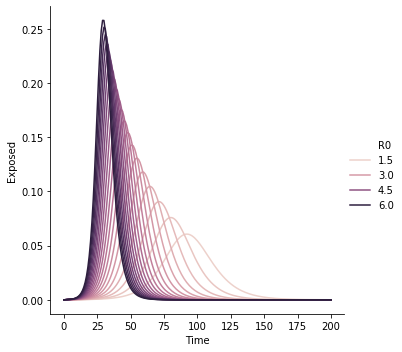

In [47]:
sns.relplot(x="Time", y="Exposed",
            hue="R0", kind="line", data=final_frame);

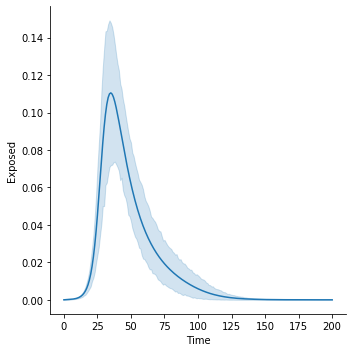

In [48]:
sns.relplot(x="Time", y="Exposed", kind="line", data=final_frame);